In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,8,Emilia-Romagna,2711,330,3041,63584,66625,-807,1170,...,40.0,17620.0,3118.0,-709.0,10.85,4.56,6.64,37.52,-1.20,-1.20
412,2021-04-12T17:00:00,8,Emilia-Romagna,2756,332,3088,63345,66433,-192,1151,...,31.0,12899.0,1830.0,-239.0,10.75,4.65,8.92,62.90,0.61,-0.29
413,2021-04-13T17:00:00,8,Emilia-Romagna,2654,331,2985,61968,64953,-1480,785,...,41.0,26058.0,2745.0,-1377.0,11.09,4.60,3.01,28.60,-0.30,-2.23
414,2021-04-14T17:00:00,8,Emilia-Romagna,2590,317,2907,62210,65117,164,859,...,30.0,27447.0,3794.0,242.0,10.90,4.46,3.13,22.64,-4.23,0.25


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1150
Nuovi tamponi: 25696.0
Percentuale nuovi positivi/nuovi tamponi: 4.0 %
Nuovi guariti: 958.0
Nuovi deceduti: 33.0
Variazione positivi ricoverati con sintomi: -126.0
Variazione positivi in terapia intensiva: -5.0
Variazione positivi in isolamento dimiciliare: 280.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,8,Emilia-Romagna,1911,171,2082,35838,37920,-658,1323,...,41.0,16816.0,4667.0,-680.0,8.21,5.49,7.87,28.35,0.00,-1.71
1,2021-02-15T17:00:00,8,Emilia-Romagna,1972,172,2144,35426,37570,-350,1391,...,21.0,12058.0,3290.0,-412.0,8.02,5.71,11.54,42.28,0.58,-0.92
2,2021-02-16T17:00:00,8,Emilia-Romagna,1975,175,2150,34887,37037,-533,968,...,35.0,34678.0,5876.0,-539.0,8.14,5.81,2.79,16.47,1.74,-1.42
3,2021-02-17T17:00:00,8,Emilia-Romagna,1902,176,2078,33190,35268,-1769,1025,...,31.0,27947.0,5739.0,-1697.0,8.47,5.89,3.67,17.86,0.57,-4.78
4,2021-02-18T17:00:00,8,Emilia-Romagna,1890,181,2071,32858,34929,-339,1565,...,22.0,29633.0,5787.0,-332.0,8.74,5.93,5.28,27.04,2.84,-0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,8,Emilia-Romagna,2711,330,3041,63584,66625,-807,1170,...,40.0,17620.0,3118.0,-709.0,10.85,4.56,6.64,37.52,-1.20,-1.20
57,2021-04-12T17:00:00,8,Emilia-Romagna,2756,332,3088,63345,66433,-192,1151,...,31.0,12899.0,1830.0,-239.0,10.75,4.65,8.92,62.90,0.61,-0.29
58,2021-04-13T17:00:00,8,Emilia-Romagna,2654,331,2985,61968,64953,-1480,785,...,41.0,26058.0,2745.0,-1377.0,11.09,4.60,3.01,28.60,-0.30,-2.23
59,2021-04-14T17:00:00,8,Emilia-Romagna,2590,317,2907,62210,65117,164,859,...,30.0,27447.0,3794.0,242.0,10.90,4.46,3.13,22.64,-4.23,0.25


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

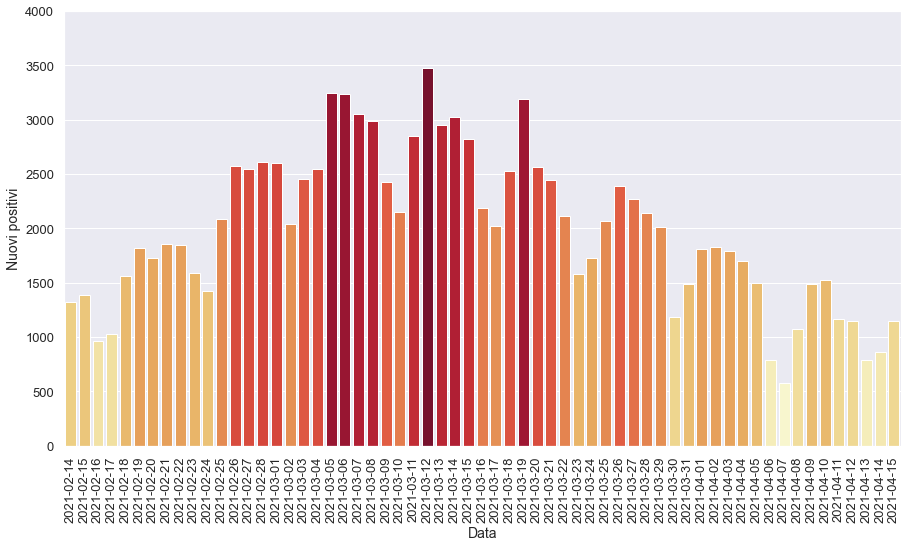

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

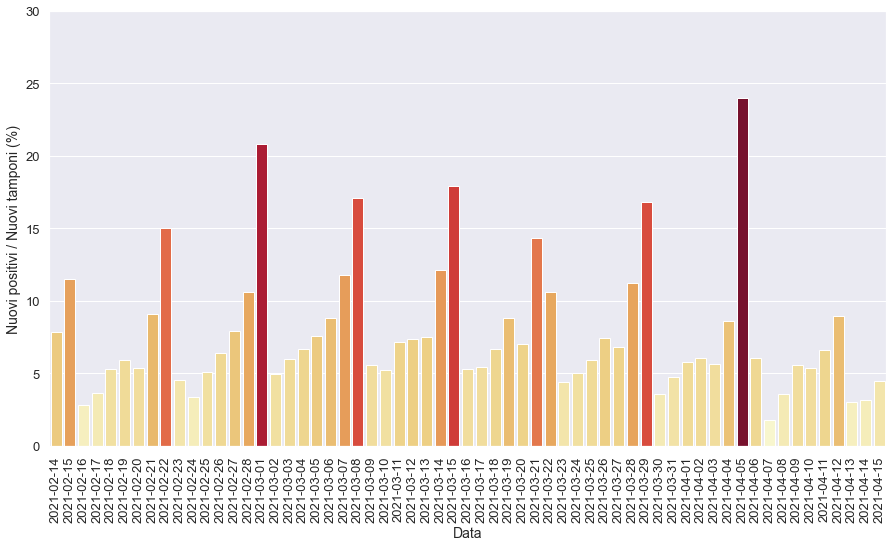

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

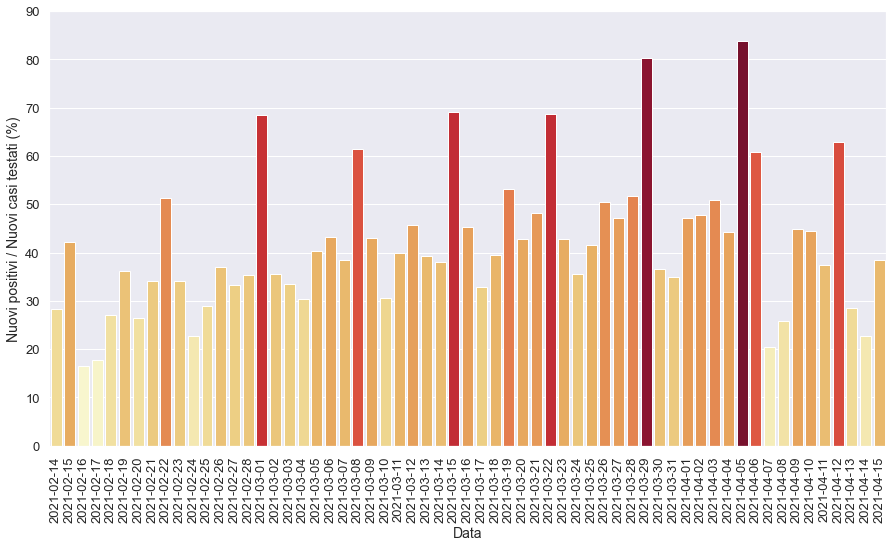

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

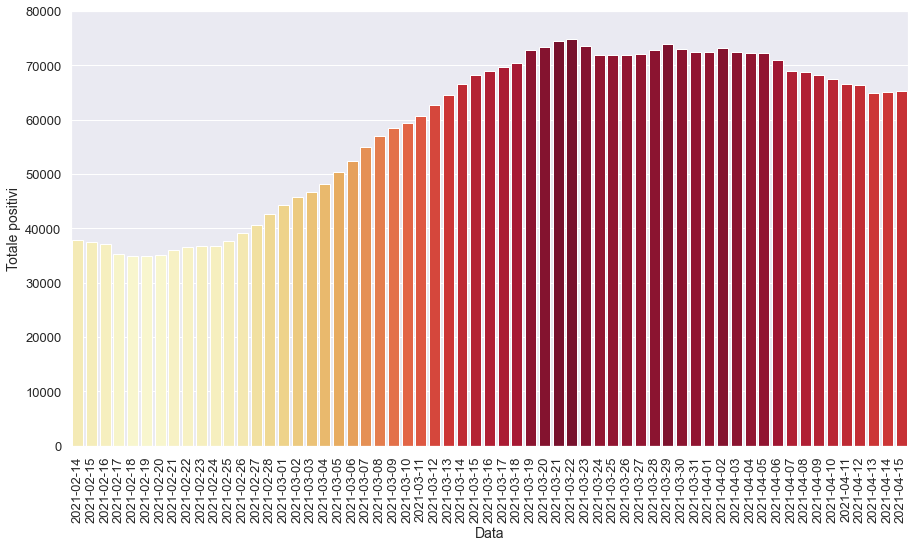

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

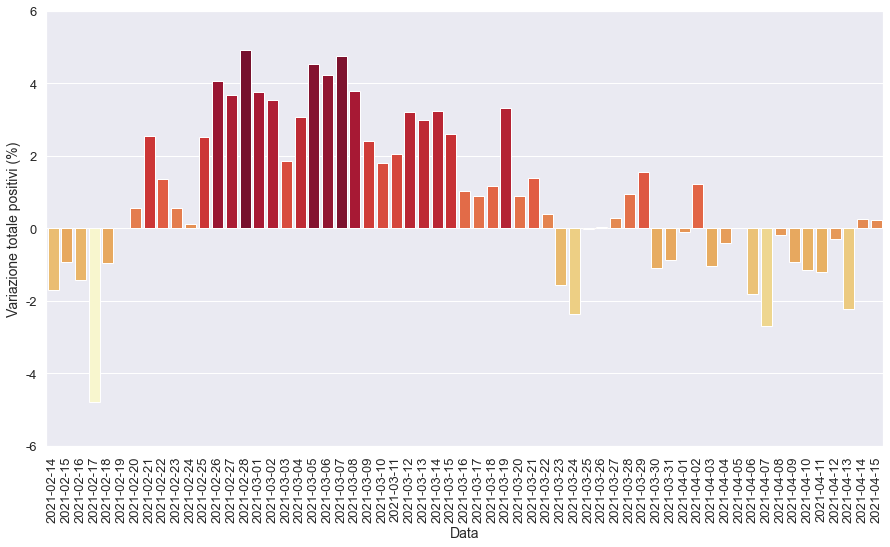

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

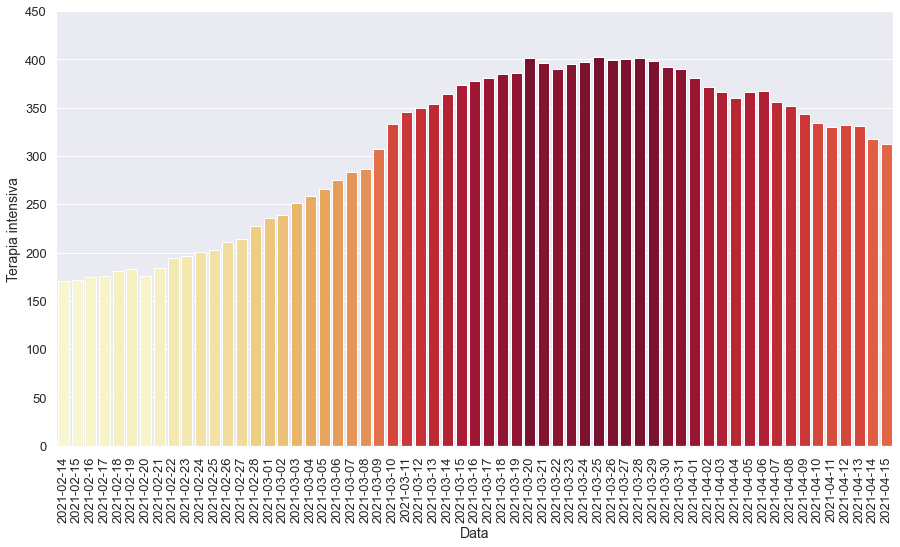

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

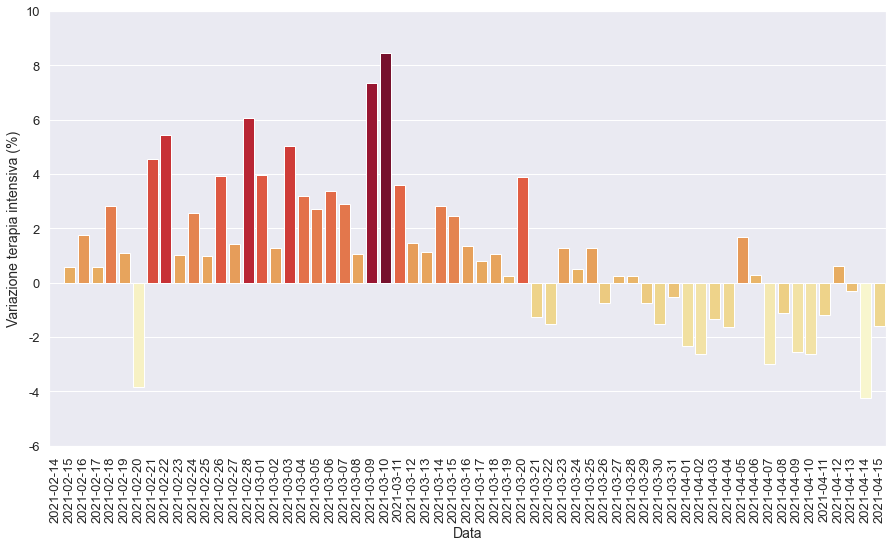

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

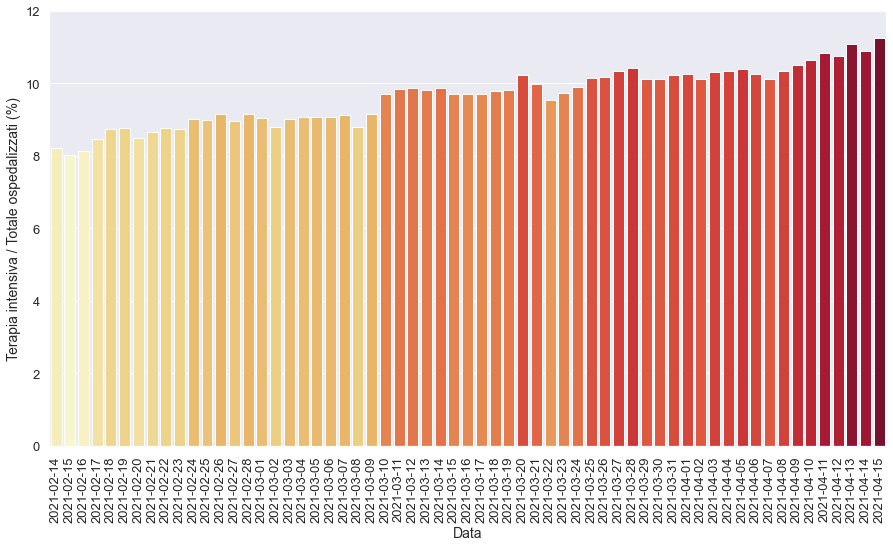

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

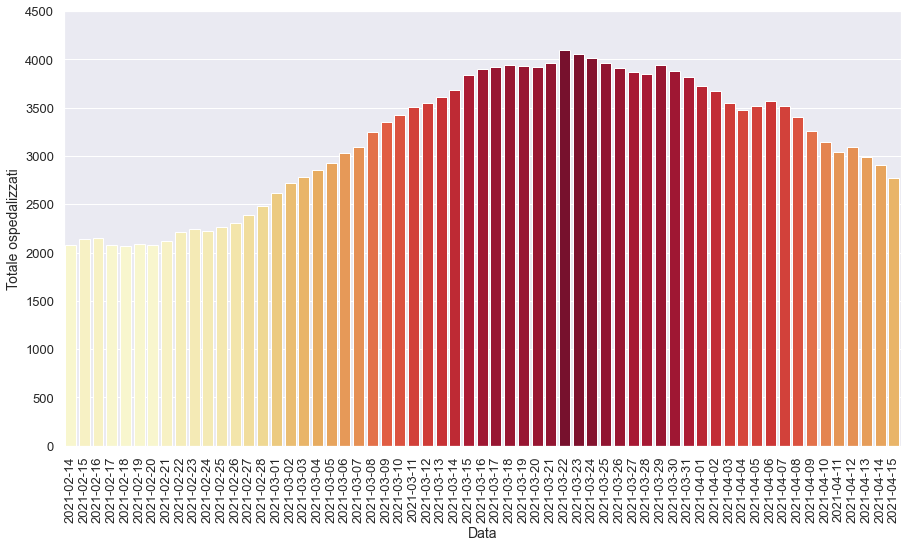

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

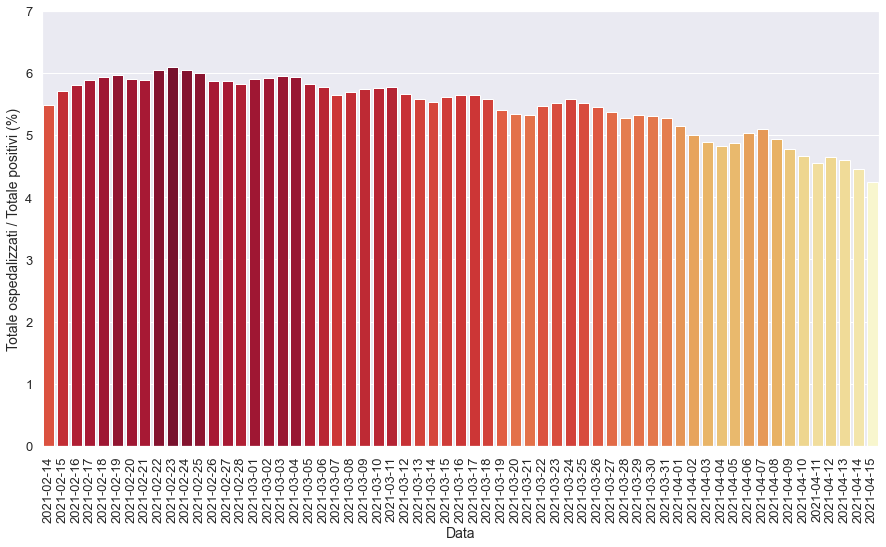

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

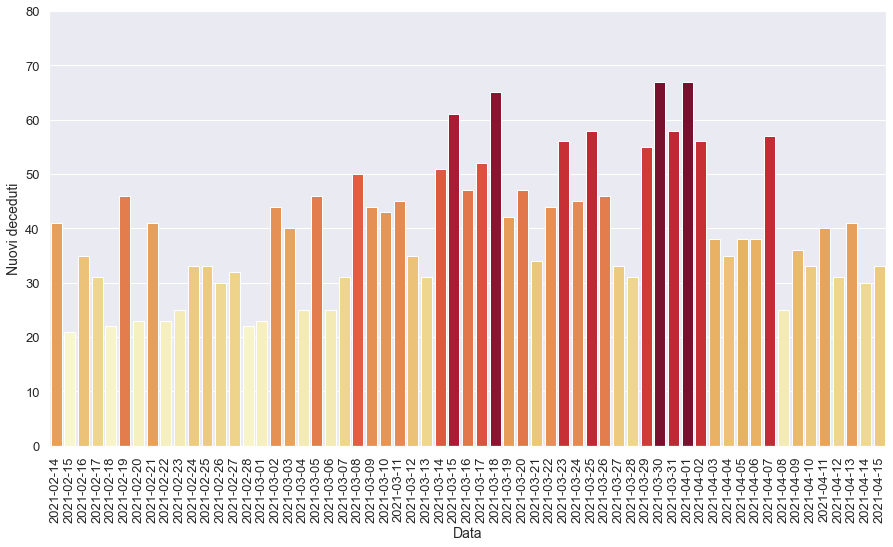

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

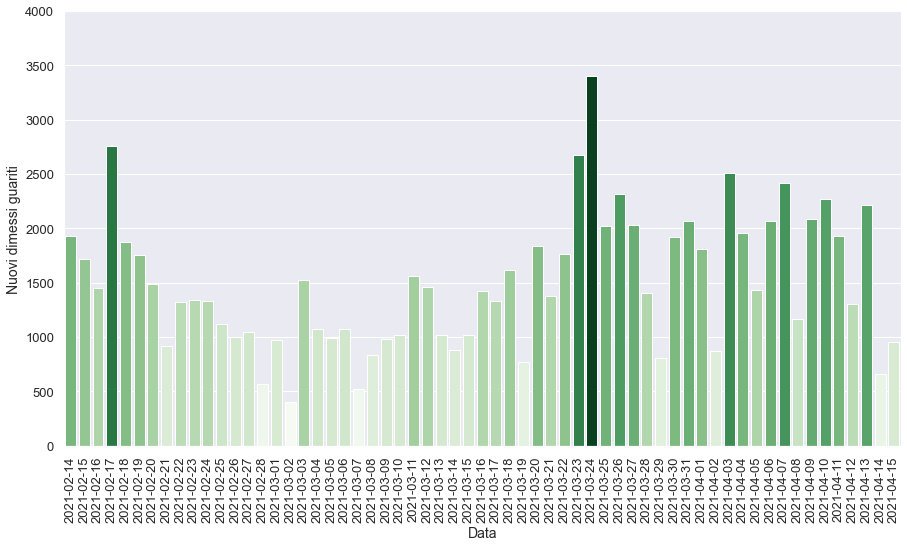

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,8,Emilia-Romagna,3516,378,3894,65098,68992,699,2184,...,47.0,41025.0,4834.0,642.0,9.71,5.64,5.32,45.18,1.34,1.02
1,2021-03-17T17:00:00,8,Emilia-Romagna,3542,381,3923,65692,69615,623,2026,...,52.0,37456.0,6155.0,594.0,9.71,5.64,5.41,32.92,0.79,0.90
2,2021-03-18T17:00:00,8,Emilia-Romagna,3551,385,3936,66502,70438,823,2531,...,65.0,37765.0,6399.0,810.0,9.78,5.59,6.70,39.55,1.05,1.18
3,2021-03-19T17:00:00,8,Emilia-Romagna,3549,386,3935,68852,72787,2349,3188,...,42.0,36016.0,6007.0,2350.0,9.81,5.41,8.85,53.07,0.26,3.33
4,2021-03-20T17:00:00,8,Emilia-Romagna,3519,401,3920,69519,73439,652,2560,...,47.0,36549.0,5976.0,667.0,10.23,5.34,7.00,42.84,3.89,0.90
5,2021-03-21T17:00:00,8,Emilia-Romagna,3566,396,3962,70502,74464,1025,2448,...,34.0,17110.0,5082.0,983.0,9.99,5.32,14.31,48.17,-1.25,1.40
6,2021-03-22T17:00:00,8,Emilia-Romagna,3702,390,4092,70679,74771,307,2118,...,44.0,19902.0,3083.0,177.0,9.53,5.47,10.64,68.70,-1.52,0.41
7,2021-03-23T17:00:00,8,Emilia-Romagna,3659,395,4054,69542,73596,-1175,1578,...,56.0,35928.0,3695.0,-1137.0,9.74,5.51,4.39,42.71,1.28,-1.57
8,2021-03-24T17:00:00,8,Emilia-Romagna,3614,397,4011,67845,71856,-1740,1725,...,45.0,34163.0,4853.0,-1697.0,9.90,5.58,5.05,35.55,0.51,-2.36
9,2021-03-25T17:00:00,8,Emilia-Romagna,3557,402,3959,67876,71835,-21,2070,...,58.0,34925.0,4978.0,31.0,10.15,5.51,5.93,41.58,1.26,-0.03


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

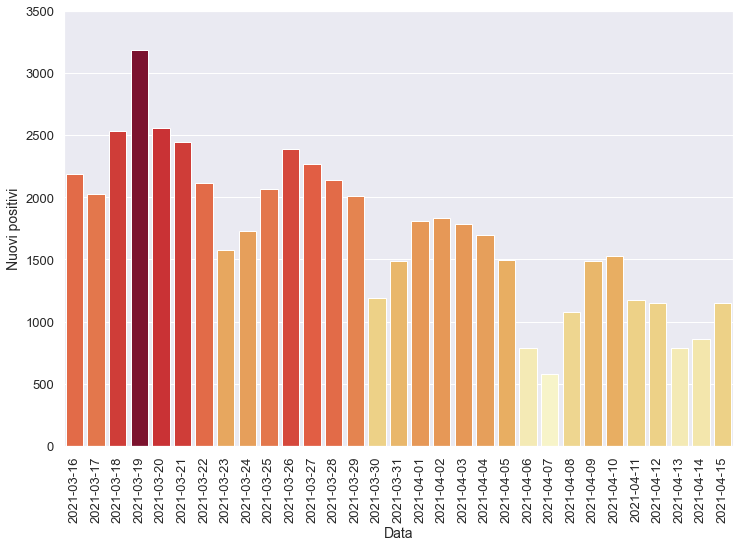

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

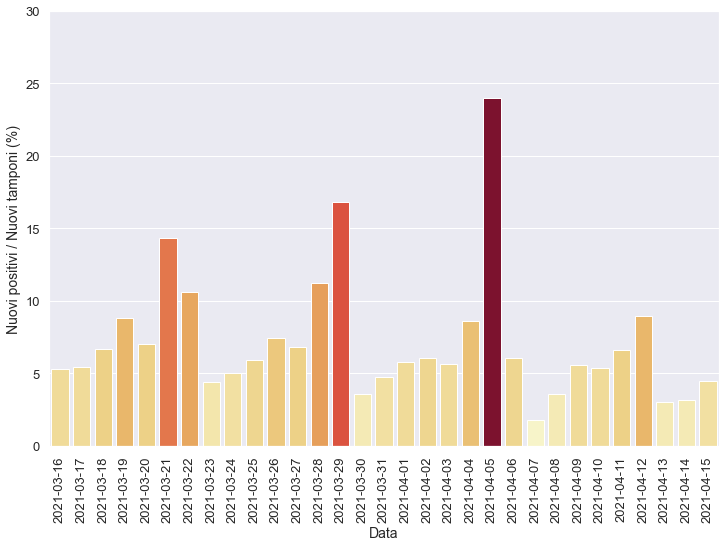

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

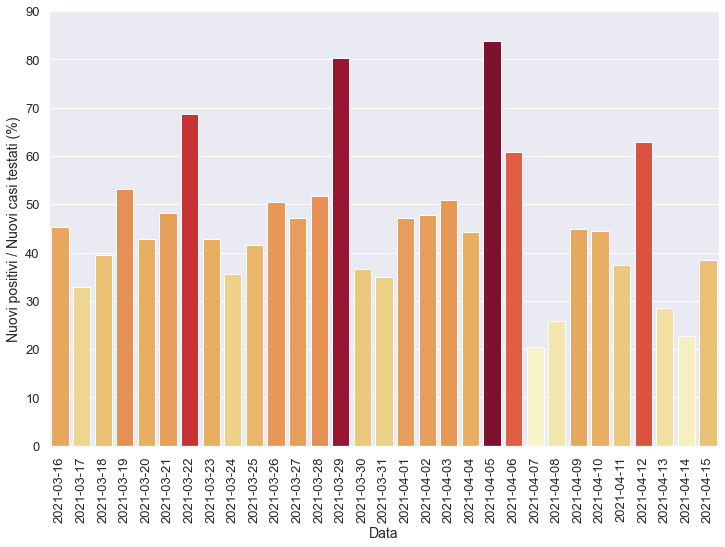

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

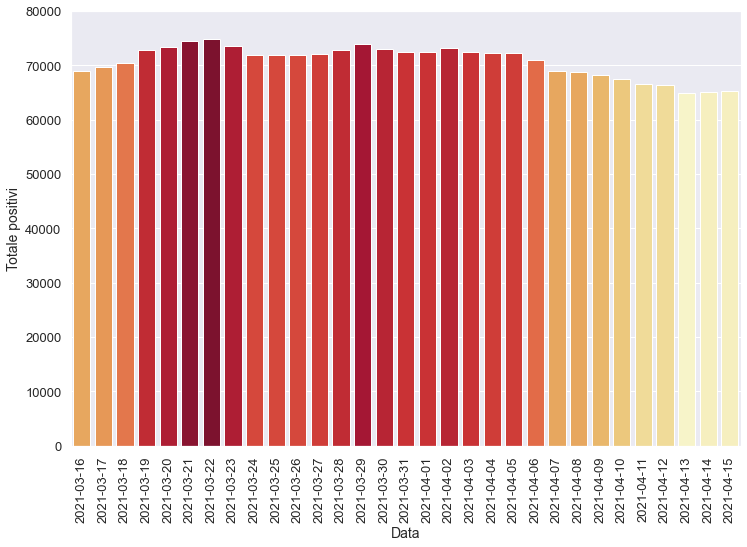

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

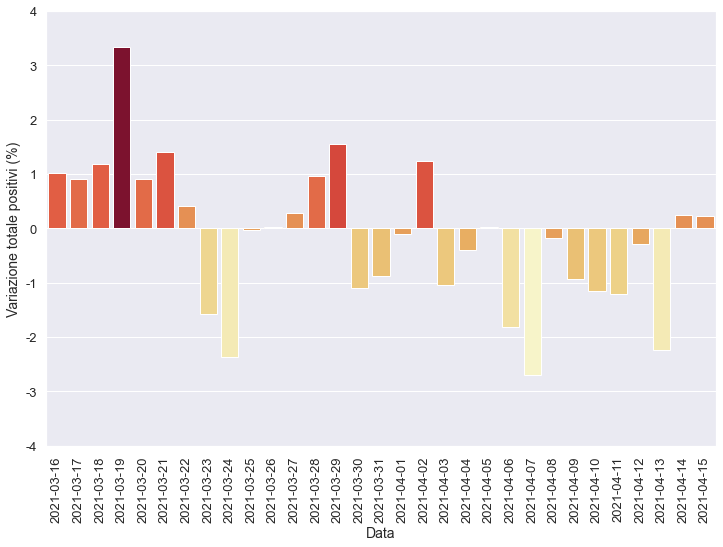

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

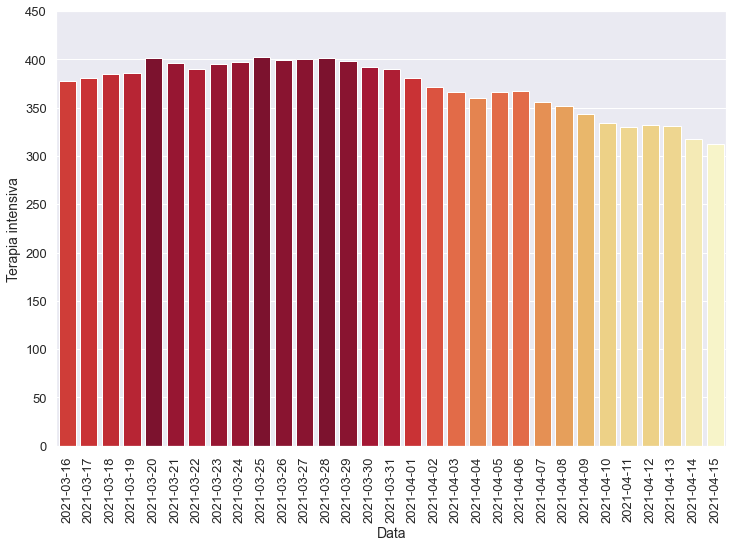

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

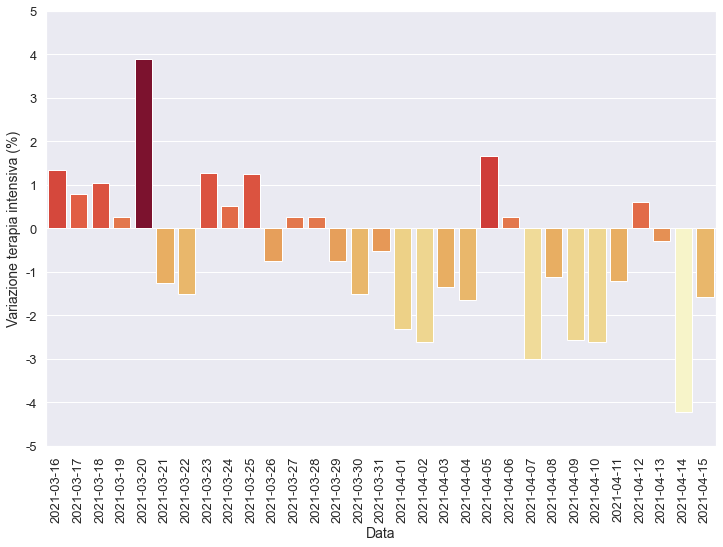

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

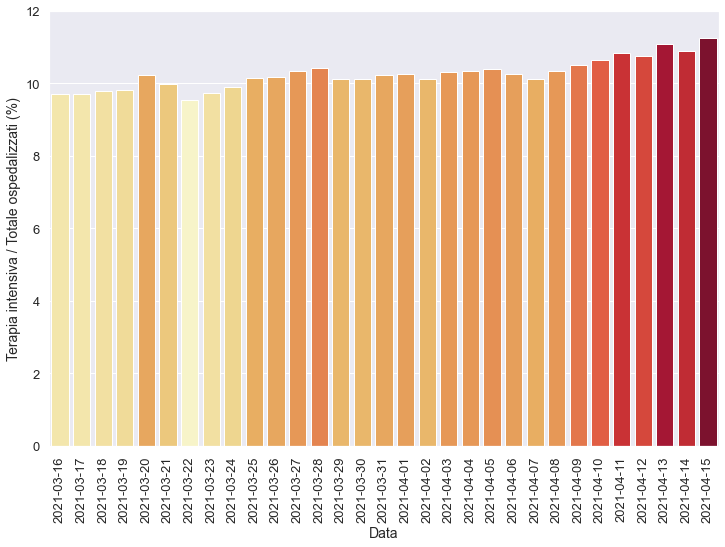

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

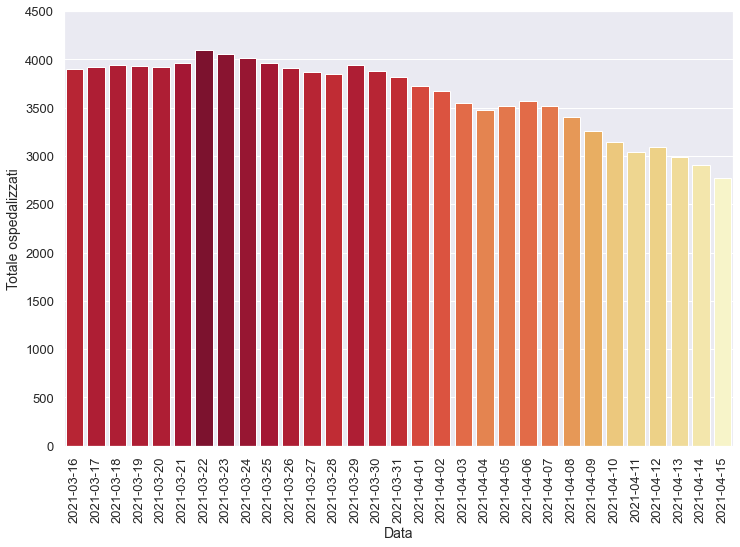

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

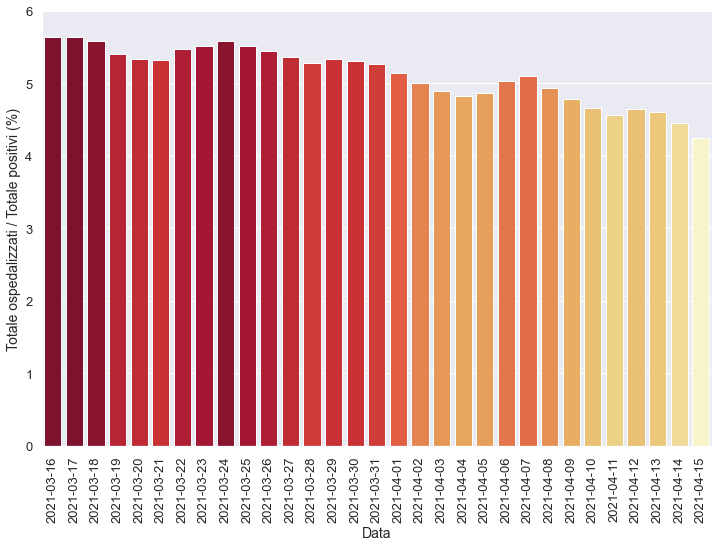

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

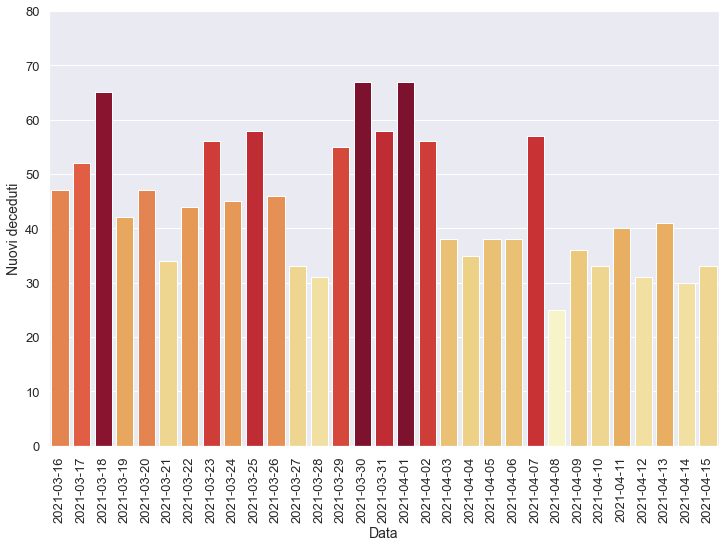

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

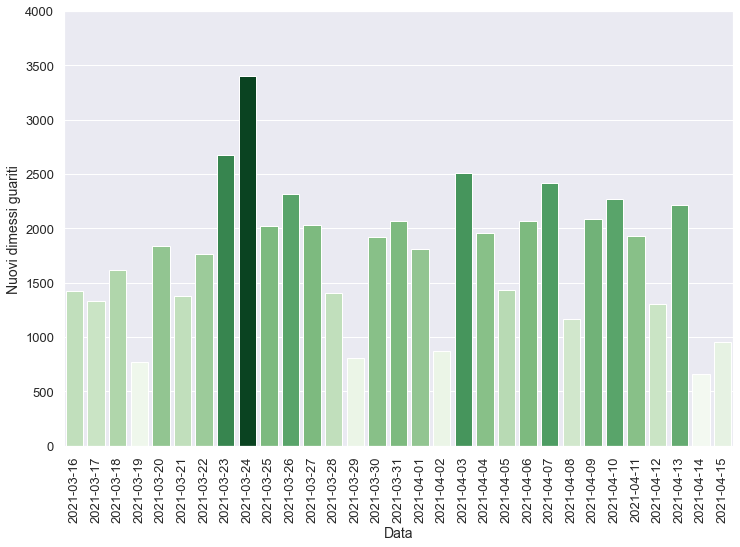

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,8,Emilia-Romagna,3051,352,3403,65452,68855,-120,1075,...,25.0,30262.0,4145.0,-7.0,10.34,4.94,3.55,25.93,-1.12,-0.17
1,2021-04-09T17:00:00,8,Emilia-Romagna,2917,343,3260,64958,68218,-637,1488,...,36.0,26682.0,3314.0,-494.0,10.52,4.78,5.58,44.90,-2.56,-0.93
2,2021-04-10T17:00:00,8,Emilia-Romagna,2805,334,3139,64293,67432,-786,1525,...,33.0,28525.0,3428.0,-665.0,10.64,4.66,5.35,44.49,-2.62,-1.15
3,2021-04-11T17:00:00,8,Emilia-Romagna,2711,330,3041,63584,66625,-807,1170,...,40.0,17620.0,3118.0,-709.0,10.85,4.56,6.64,37.52,-1.20,-1.20
4,2021-04-12T17:00:00,8,Emilia-Romagna,2756,332,3088,63345,66433,-192,1151,...,31.0,12899.0,1830.0,-239.0,10.75,4.65,8.92,62.90,0.61,-0.29
5,2021-04-13T17:00:00,8,Emilia-Romagna,2654,331,2985,61968,64953,-1480,785,...,41.0,26058.0,2745.0,-1377.0,11.09,4.60,3.01,28.60,-0.30,-2.23
6,2021-04-14T17:00:00,8,Emilia-Romagna,2590,317,2907,62210,65117,164,859,...,30.0,27447.0,3794.0,242.0,10.90,4.46,3.13,22.64,-4.23,0.25
7,2021-04-15T17:00:00,8,Emilia-Romagna,2464,312,2776,62490,65266,149,1150,...,33.0,25696.0,2990.0,280.0,11.24,4.25,4.48,38.46,-1.58,0.23


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

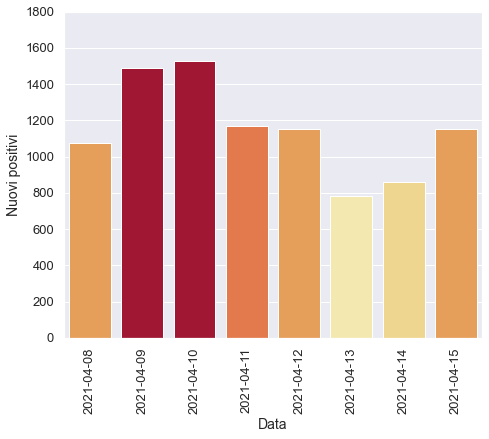

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

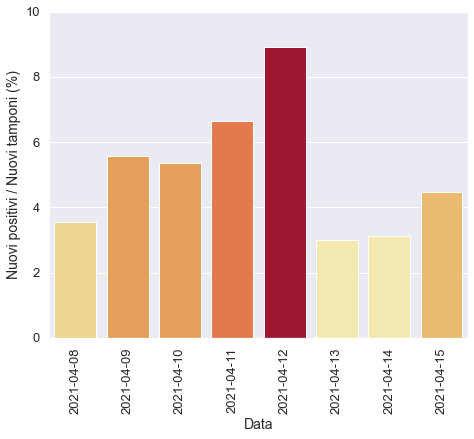

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

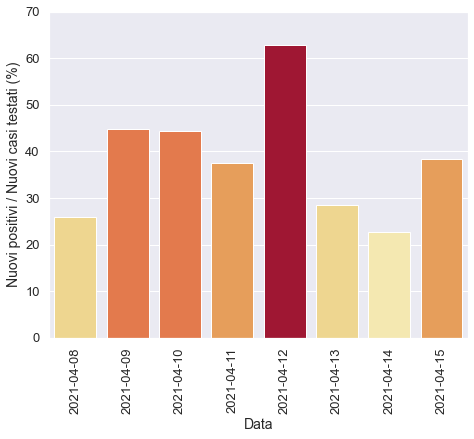

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

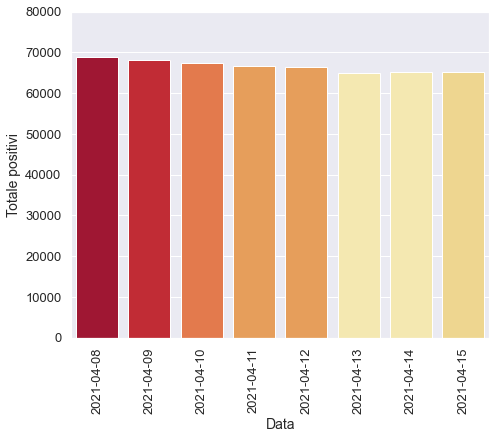

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

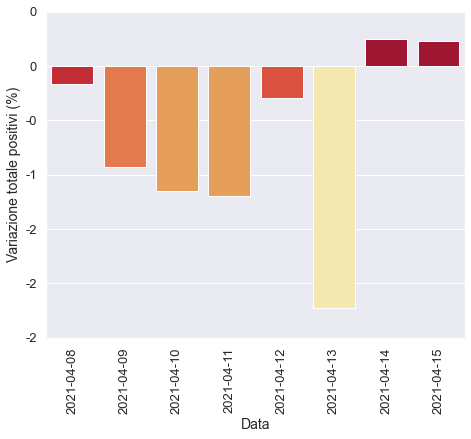

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

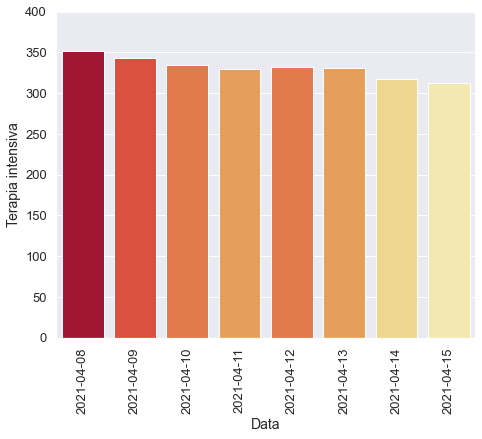

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

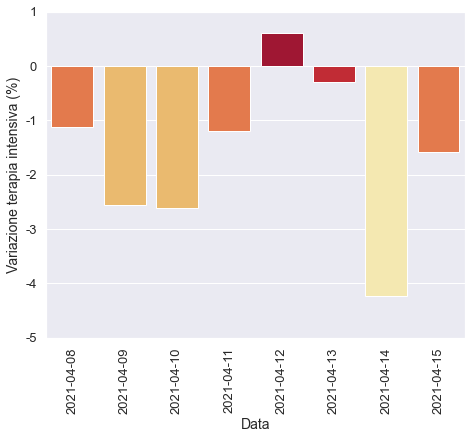

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

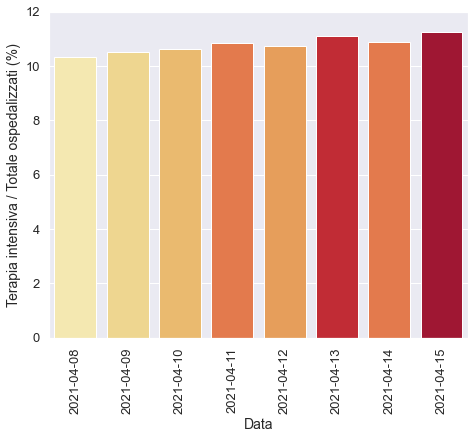

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

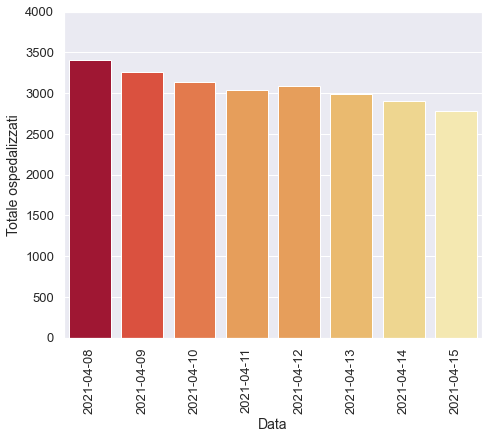

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

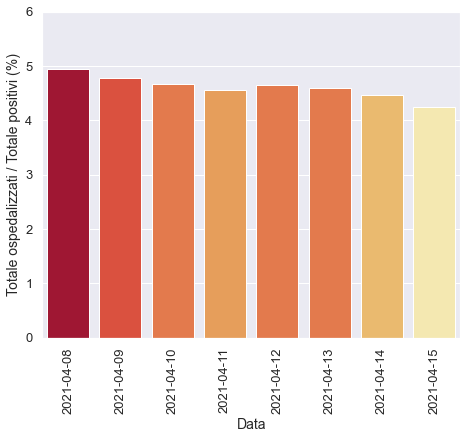

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

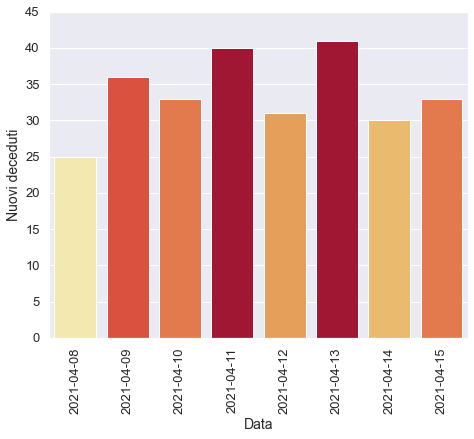

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

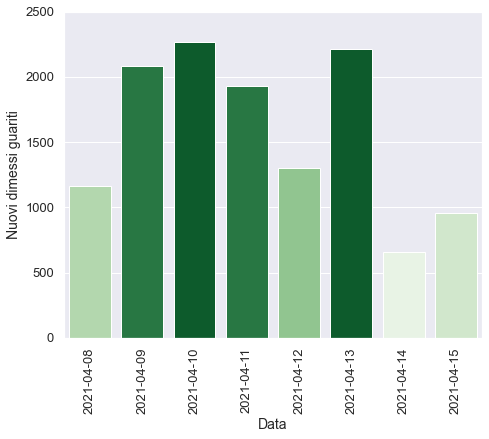

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)